# introduction to neural network classification with tensorflow

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles
# make 1000 examples
n_samples = 1000


# Create circles
X, y = make_circles(n_samples, 
                   noise = 0.03, 
                   random_state=42)


In [2]:
# Check out features
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels 
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

# Visualize the data

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


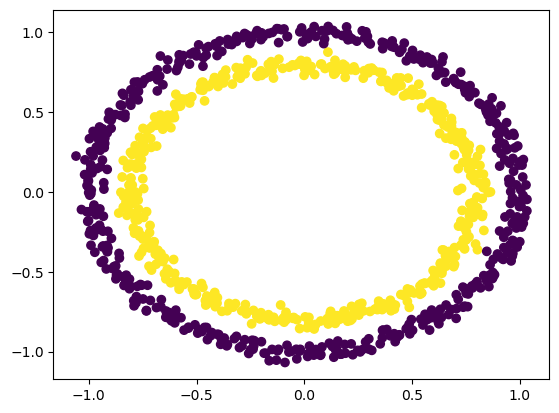

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

## input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
X[110], y[110]

(array([0.76597921, 0.29169219]), 1)

## steps in modelling

In [9]:
import tensorflow as tf

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 0.7460 - accuracy: 0.5040
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7427 - accuracy: 0.5020
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7396 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7368 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7342 - accuracy: 0.4990


In [11]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7329 - accuracy: 0.4990


[0.7329167723655701, 0.49900001287460327]

## Improving our model

In [13]:
# improve our model by training longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4960


[0.6931474208831787, 0.4959999918937683]

In [14]:
# improve our model by adding another layers
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)


In [15]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.5070


[0.6979529857635498, 0.5070000290870667]

## visualize our model prediction

In [16]:
import numpy as np


In [17]:

def plot_decision_boundary(model, x, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    #make predictions
    y_pred = model.predict(x_in)
    
    #check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


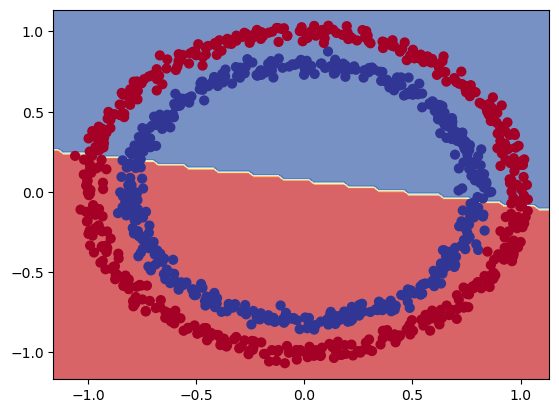

In [19]:
plot_decision_boundary(model_1, X, y)

In [20]:
# improve our model by adding activation function
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.7040


[0.6554643511772156, 0.7039999961853027]

In [26]:
# let's see if our model can be used for a regression problem

tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) #y = X + 100

#Split our data 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 636.8101 - mae: 636.8101
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 532.7436 - mae: 532.7436
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 434.6766 - mae: 434.6766
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 334.7863 - mae: 334.7863
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 232.3140 - mae: 232.3140
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 122.7146 - mae: 122.7146
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 54.7475 - mae: 54.7475
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 78.3393 - mae: 78.3393
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 71.4528 - mae: 71.4528
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 47.3644 - mae: 47.3644
Epoch 11/100
5/5 [=============================

2/2 [==============================] - 0s 3ms/step


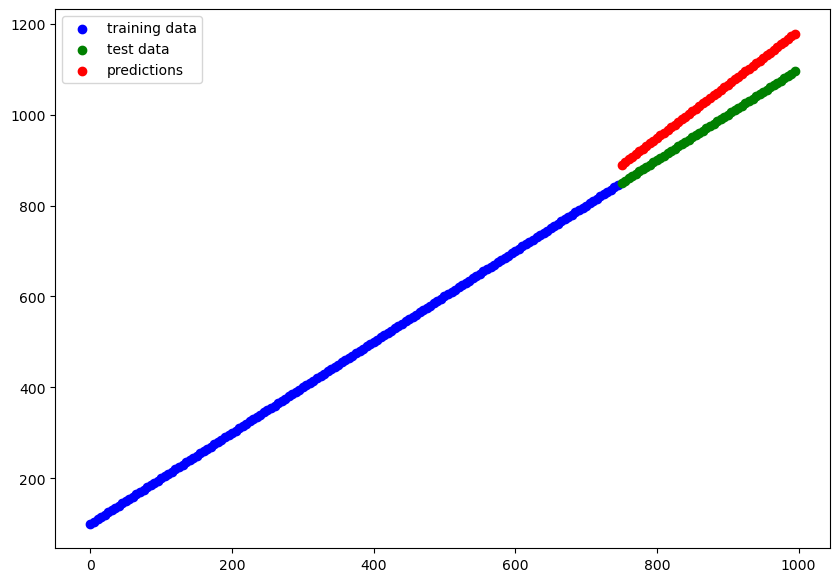

In [32]:
# make predictions with our trained model

y_reg_preds = model_4.predict(X_reg_test)

#plot the model's preditions 
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="predictions")
plt.legend()

## Non-linearity